Email Spam Detection using Naive Bayes and Random Forest


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier # Added RandomForest
from sklearn.metrics import accuracy_score # Import for accuracy calculation
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Load dataset
spamdf = pd.read_csv('/content/drive/MyDrive/AIML data sets /spam.csv')

In [ ]:
# Inspect data
spamdf.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
# To check the null elements
print(spamdf.isnull().sum())

Category          0
Message           0
Message_Length    0
spam              0
dtype: int64


In [ ]:
# Add a new column for message length
spamdf['Message_Length'] = spamdf['Message'].apply(len)

In [ ]:
# Create a 'spam' column where spam=1 and ham=0
spamdf['spam'] = spamdf['Category'].apply(lambda x: 1 if x == 'spam' else 0)
spamdf.head()

,Category,Message,Message_Length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


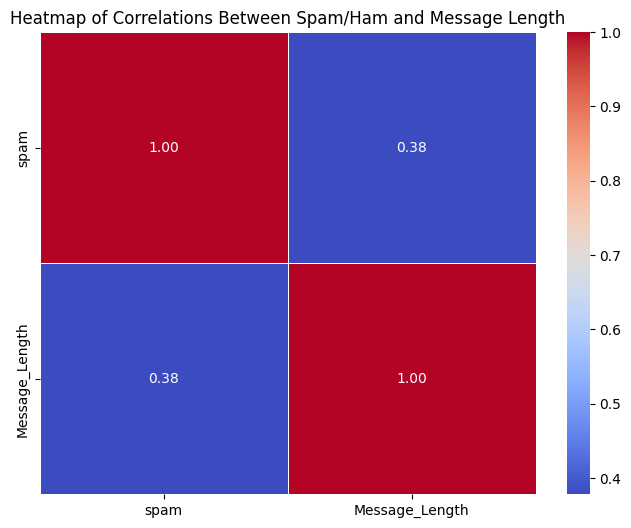

In [ ]:

spamdf['Message_Length'] = spamdf['Message'].apply(len)
# select the numeric columns for correlation (spam, Message_Length)
correlation_data = spamdf[['spam', 'Message_Length']]
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations Between Spam/Ham and Message Length')
plt.show()


<ipython-input-9-7eb0eab6670c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=spamdf, palette='coolwarm')


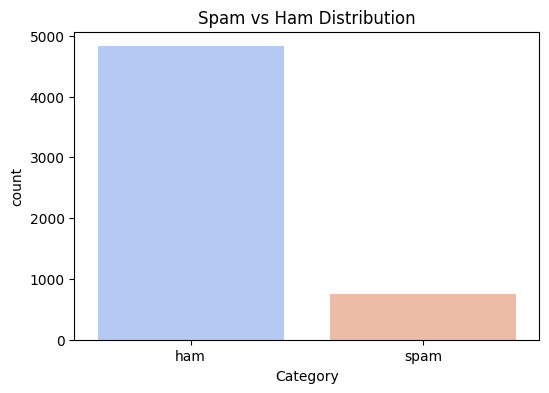

Category Distribution:
 Category
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:

# Count the occurrences of spam and ham
category_distribution = spamdf['Category'].value_counts()

# Plot the distribution of spam and ham
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=spamdf, palette='coolwarm')
plt.title("Spam vs Ham Distribution")
plt.show()

# Print the counts
print("Category Distribution:\n", category_distribution)


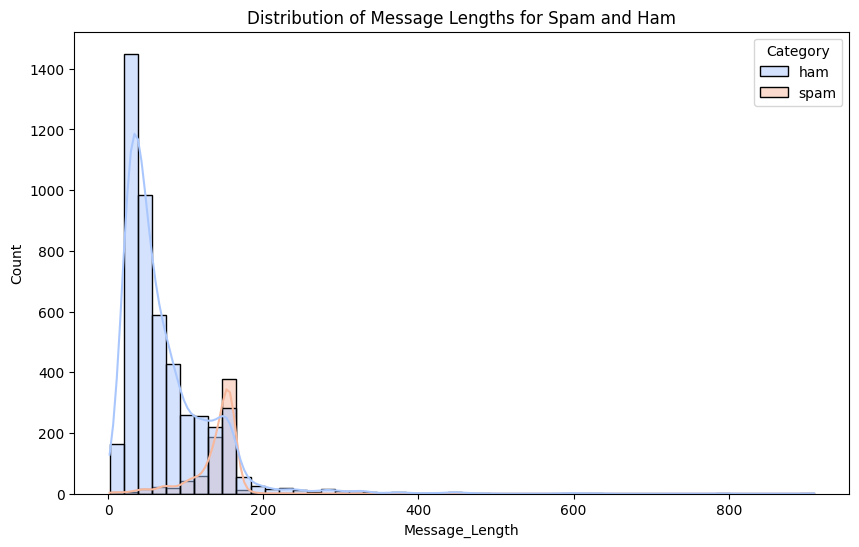

           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0


In [ ]:
# Create a column for message length
spamdf['Message_Length'] = spamdf['Message'].apply(len)

# Plot the distribution of message length for spam and ham
plt.figure(figsize=(10,6))
sns.histplot(data=spamdf, x='Message_Length', hue='Category', bins=50, kde=True, palette='coolwarm')
plt.title("Distribution of Message Lengths for Spam and Ham")
plt.show()

# Summary statistics of message length by category
print(spamdf.groupby('Category')['Message_Length'].describe())



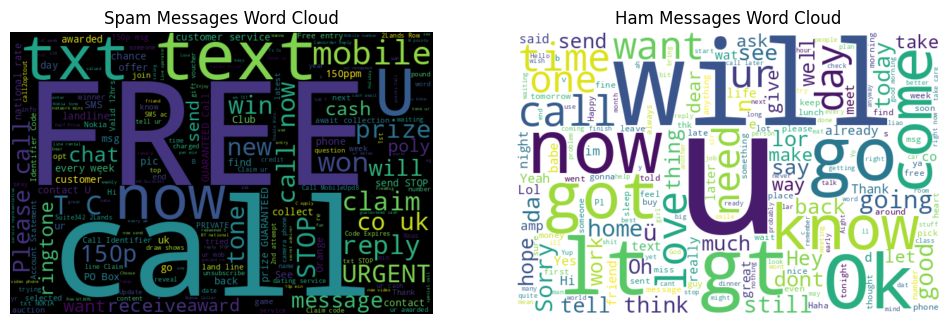

In [ ]:
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = ' '.join(spamdf[spamdf['Category'] == 'spam']['Message'])
ham_messages = ' '.join(spamdf[spamdf['Category'] == 'ham']['Message'])

# Generate word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(spam_messages)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_messages)

# Plot the word clouds
plt.figure(figsize=(12,6))

# Spam word cloud
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

# Ham word cloud
plt.subplot(1,2,2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
spamdf


,Category,Message,Message_Length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,1
5568,ham,Will ü b going to esplanade fr home?,36,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(spamdf.Message, spamdf.spam, test_size=0.2)

In [ ]:
# Vectorize the text data
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_test_count = cv.transform(x_test.values)

In [ ]:
x_train.describe()

,Message
count,4457
unique,4160
top,"Sorry, I'll call later"
freq,24


In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train_count, y_train)

MultinomialNB()

In [ ]:
# Test the Naive Bayes model and get accuracy
nb_predictions = nb_model.predict(x_test_count)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Naive Bayes Accuracy: 0.9803


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Added Random Forest
rf_model.fit(x_train_count, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Test the Random Forest model and get accuracy
rf_predictions = rf_model.predict(x_test_count)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9677


In [ ]:
def spam_detection():
    while True:
        print("\nSpam Detection System")
        print("1. Check Email")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")
        if choice == '1':
            email = input("Enter the email text: ")
            # Transform the input email into a word count matrix using the trained CountVectorizer
            email_count = cv.transform([email])

            # Use the Naive Bayes model to make a prediction
            prediction = nb_model.predict(email_count)

            # Print the prediction result: 'ham' or 'spam'
            if prediction[0] == 0:
                print("Naive Bayes Prediction: Ham")
            else:
                print("Naive Bayes Prediction: Spam")

        elif choice == '2':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please enter 1 or 2.")




In [ ]:
# Call the spam detection function to run the program
spam_detection()


Spam Detection System
1. Check Email
2. Exit
Enter your choice (1/2): 1
Enter the email text: hello how are you
Naive Bayes Prediction: Ham

Spam Detection System
1. Check Email
2. Exit
Enter your choice (1/2): 1
Enter the email text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C
Naive Bayes Prediction: Spam

Spam Detection System
1. Check Email
2. Exit
Enter your choice (1/2): 2
Exiting the program.
